In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(6.52507122178605, 105.07136448708837),
 (-30.88851128559518, 152.59668665613674),
 (-65.9410912736848, 178.0025245863277),
 (-64.29495129953625, -99.81005047128711),
 (57.126290908280026, 113.12459197129061),
 (-75.53353090217125, -38.75857294778686),
 (21.981494751449688, 132.2035254472521),
 (-20.950617345675184, -18.585491924397957),
 (-69.99759012806632, 34.479268613528035),
 (-65.17027560708526, -3.4385477834207734),
 (-55.91055288652719, 95.9217441421593),
 (-44.86181661926096, 90.21627322688056),
 (12.974348710528815, -169.22227396345147),
 (-38.66909435972369, 4.874900910994597),
 (50.56928448680577, -116.84761363568808),
 (82.82529877611901, 69.15498087242028),
 (-47.68185184730359, 126.79314121214753),
 (78.90046606808218, 155.25343671060386),
 (-21.332957878315625, 25.61384638170361),
 (-19.6872217590511, 36.68372082516635),
 (-82.08209905549027, 118.94305316197756),
 (37.03472513091822, -72.5788521955445),
 (88.31039387418971, -178.58048586986632),
 (41.55660456237405, 17

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kuala terengganu my
kempsey au
kaitangata nz
punta arenas cl
yanchukan ru
ushuaia ar
nishihara jp
georgetown sh
port elizabeth za
cape town za
busselton au
busselton au
kapaa us
saldanha za
golden ca
dikson ru
esperance au
chokurdakh ru
letlhakane bw
quelimane mz
albany au
atlantic city us
mys shmidta ru
nikolskoye ru
lianzhou cn
miri my
cherskiy ru
iqaluit ca
punta arenas cl
kapaa us
punta arenas cl
afmadu so
tuktoyaktuk ca
codrington ag
tara ru
busselton au
port macquarie au
kapaa us
okha ru
rikitea pf
jamestown sh
rikitea pf
victor harbor au
kidal ml
atuona pf
ucluelet ca
hamilton bm
ruidoso us
rikitea pf
kodiak us
coahuayana mx
toora-khem ru
paradwip in
ushuaia ar
kapaa us
faya td
illoqqortoormiut gl
mayo ca
punta arenas cl
ushuaia ar
amderma ru
kudahuvadhoo mv
atuona pf
bredasdorp za
quatre cocos mu
arawa pg
arraial do cabo br
flinders au
amderma ru
buraydah sa
nhulunbuy au
marsabit ke
kodiak us
arraial do cabo br
busselton au
yellowknife ca
butaritari ki
nikolskoye ru
carnarvon a

port blair in
meyungs pw
mataura pf
sooke ca
na wa th
las vegas us
karaton kz
albany au
umzimvubu za
cassilandia br
saint anthony ca
albany au
bluff nz
punta arenas cl
gitarama rw
aklavik ca
mar del plata ar
umzimvubu za
talmenka ru
atherton au
chokurdakh ru
tasiilaq gl
baculin ph
illoqqortoormiut gl
la peca pe
upernavik gl
falealupo ws
dikson ru
kapaa us
luzhou cn
kajaani fi
punta arenas cl
san patricio mx
upernavik gl
ormond beach us
bredasdorp za
magnor no
townsville au
rawson ar
jamestown sh
port alfred za
hobart au
saskylakh ru
ourem br
saskylakh ru
san anselmo us
vaini to
nishihara jp
mogadishu so
sinnamary gf
nikolskoye ru
carnarvon au
korla cn
illoqqortoormiut gl
sinkat sd
rikitea pf
nikolskoye ru
ancud cl
zyryanka ru
rikitea pf
hobart au
butaritari ki
fairbanks us
bonito oriental hn
jamestown sh
ambulu id
gorkovskoye ru
arrecife es
mar del plata ar
port elizabeth za
vaini to
upernavik gl
vaini to
saskylakh ru
punta arenas cl
ushuaia ar
rikitea pf
arraial do cabo br
ketchikan u

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

626

In [7]:
#import dependencies
from config import weather_api_key
import requests
from datetime import datetime

In [8]:
#build basic url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i,city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kuala terengganu
Processing Record 2 of Set 1 | kempsey
Processing Record 3 of Set 1 | kaitangata
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | yanchukan
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | nishihara
Processing Record 8 of Set 1 | georgetown
Processing Record 9 of Set 1 | port elizabeth
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | kapaa
Processing Record 13 of Set 1 | saldanha
Processing Record 14 of Set 1 | golden
Processing Record 15 of Set 1 | dikson
Processing Record 16 of Set 1 | esperance
Processing Record 17 of Set 1 | chokurdakh
Processing Record 18 of Set 1 | letlhakane
Processing Record 19 of Set 1 | quelimane
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | atlantic city
Processing Record 22 of Set 1 | my

Processing Record 37 of Set 4 | isangel
Processing Record 38 of Set 4 | mitsamiouli
Processing Record 39 of Set 4 | nanortalik
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | aranos
Processing Record 42 of Set 4 | karratha
Processing Record 43 of Set 4 | amahai
Processing Record 44 of Set 4 | faanui
Processing Record 45 of Set 4 | areni
Processing Record 46 of Set 4 | bambous virieux
Processing Record 47 of Set 4 | monaghan
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | katsuura
Processing Record 50 of Set 4 | chaiyaphum
Processing Record 1 of Set 5 | dryden
Processing Record 2 of Set 5 | puerto del rosario
Processing Record 3 of Set 5 | rocha
Processing Record 4 of Set 5 | aripuana
Processing Record 5 of Set 5 | victoria
Processing Record 6 of Set 5 | nacala
Processing Record 7 of Set 5 | tessalit
Processing Record 8 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 9 of Set 5 | mahebourg
Processing Record 10 of Set 5 | kw

City not found. Skipping...
Processing Record 35 of Set 8 | cassilandia
Processing Record 36 of Set 8 | saint anthony
Processing Record 37 of Set 8 | gitarama
Processing Record 38 of Set 8 | aklavik
Processing Record 39 of Set 8 | talmenka
Processing Record 40 of Set 8 | atherton
Processing Record 41 of Set 8 | baculin
Processing Record 42 of Set 8 | la peca
Processing Record 43 of Set 8 | falealupo
City not found. Skipping...
Processing Record 44 of Set 8 | luzhou
Processing Record 45 of Set 8 | kajaani
Processing Record 46 of Set 8 | ormond beach
Processing Record 47 of Set 8 | magnor
Processing Record 48 of Set 8 | townsville
Processing Record 49 of Set 8 | ourem
Processing Record 50 of Set 8 | san anselmo
Processing Record 1 of Set 9 | mogadishu
Processing Record 2 of Set 9 | korla
Processing Record 3 of Set 9 | sinkat
City not found. Skipping...
Processing Record 4 of Set 9 | zyryanka
Processing Record 5 of Set 9 | fairbanks
Processing Record 6 of Set 9 | bonito oriental
Processin

Processing Record 22 of Set 12 | hammerfest
Processing Record 23 of Set 12 | ust-kut
Processing Record 24 of Set 12 | chulman
Processing Record 25 of Set 12 | damietta
Processing Record 26 of Set 12 | keighley
Processing Record 27 of Set 12 | cayenne
Processing Record 28 of Set 12 | opuwo
Processing Record 29 of Set 12 | santa cruz de tenerife
Processing Record 30 of Set 12 | tateyama
Processing Record 31 of Set 12 | ongandjera
Processing Record 32 of Set 12 | andenes
Processing Record 33 of Set 12 | lae
Processing Record 34 of Set 12 | homer
Processing Record 35 of Set 12 | zhumadian
Processing Record 36 of Set 12 | half moon bay
Processing Record 37 of Set 12 | ganzhou
Processing Record 38 of Set 12 | nuevitas
Processing Record 39 of Set 12 | hami
Processing Record 40 of Set 12 | warqla
City not found. Skipping...
Processing Record 41 of Set 12 | beloha
Processing Record 42 of Set 12 | flin flon
Processing Record 43 of Set 12 | vila franca do campo
Processing Record 44 of Set 12 | is

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kuala Terengganu,5.3302,103.1408,85.95,84,20,3.44,MY,2021-07-18 03:36:20
1,Kempsey,-31.0833,152.8333,67.95,41,2,5.01,AU,2021-07-18 03:36:20
2,Kaitangata,-46.2817,169.8464,46.04,93,100,4.99,NZ,2021-07-18 03:36:02
3,Punta Arenas,-53.1500,-70.9167,37.51,81,75,9.22,CL,2021-07-18 03:33:57
4,Ushuaia,-54.8000,-68.3000,40.66,52,40,17.27,AR,2021-07-18 03:36:21
5,Nishihara,26.1842,127.7558,89.26,80,75,13.80,JP,2021-07-18 03:36:10
6,Georgetown,5.4112,100.3354,88.90,73,20,1.01,MY,2021-07-18 03:33:53
7,Port Elizabeth,-33.9180,25.5701,46.69,93,0,2.30,ZA,2021-07-18 03:34:08
8,Cape Town,-33.9258,18.4232,53.11,100,0,5.75,ZA,2021-07-18 03:29:41
9,Busselton,-33.6500,115.3333,57.09,72,78,12.19,AU,2021-07-18 03:33:47


In [13]:
# Rearrange columns
new_columns = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_columns]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kuala Terengganu,MY,2021-07-18 03:36:20,5.3302,103.1408,85.95,84,20,3.44
1,Kempsey,AU,2021-07-18 03:36:20,-31.0833,152.8333,67.95,41,2,5.01
2,Kaitangata,NZ,2021-07-18 03:36:02,-46.2817,169.8464,46.04,93,100,4.99
3,Punta Arenas,CL,2021-07-18 03:33:57,-53.1500,-70.9167,37.51,81,75,9.22
4,Ushuaia,AR,2021-07-18 03:36:21,-54.8000,-68.3000,40.66,52,40,17.27
5,Nishihara,JP,2021-07-18 03:36:10,26.1842,127.7558,89.26,80,75,13.80
6,Georgetown,MY,2021-07-18 03:33:53,5.4112,100.3354,88.90,73,20,1.01
7,Port Elizabeth,ZA,2021-07-18 03:34:08,-33.9180,25.5701,46.69,93,0,2.30
8,Cape Town,ZA,2021-07-18 03:29:41,-33.9258,18.4232,53.11,100,0,5.75
9,Busselton,AU,2021-07-18 03:33:47,-33.6500,115.3333,57.09,72,78,12.19


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

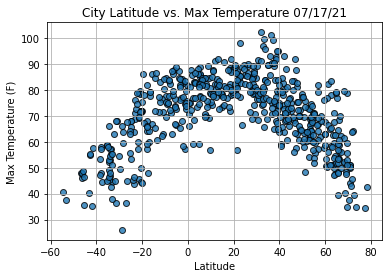

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

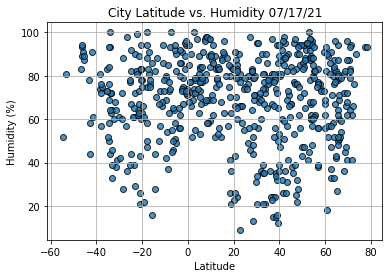

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

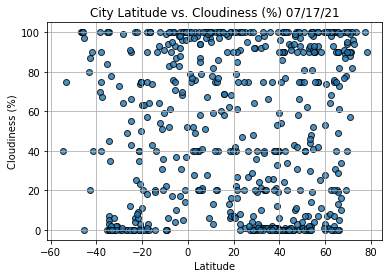

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

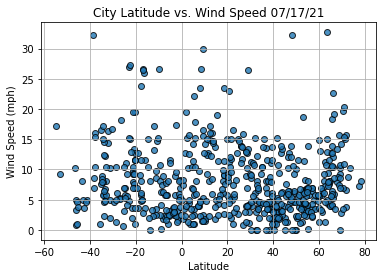

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [28]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

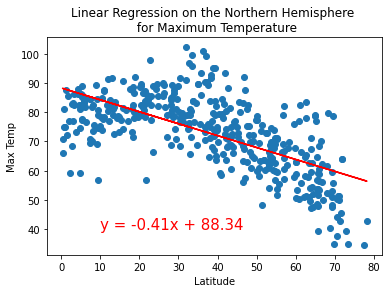

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

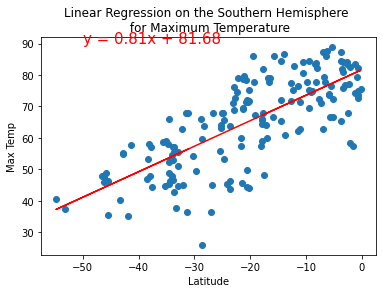

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

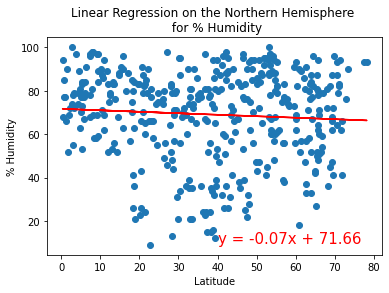

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

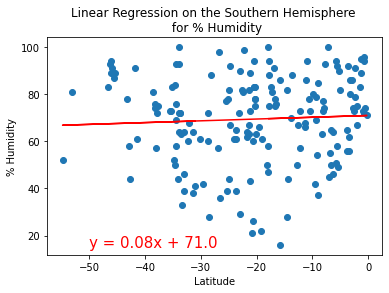

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

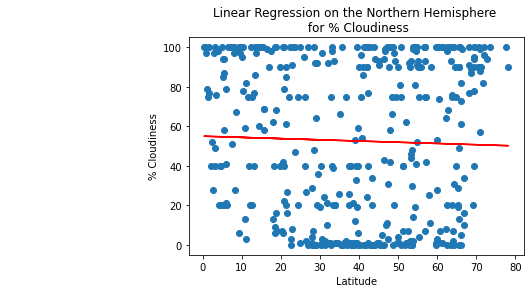

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

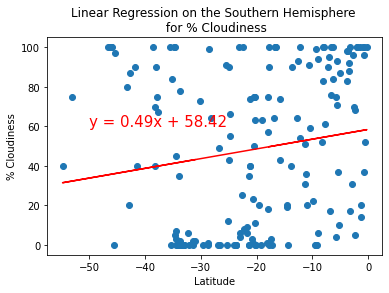

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

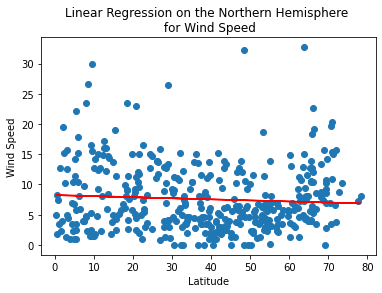

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

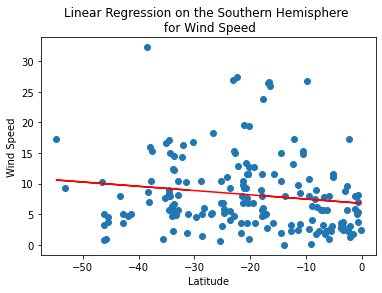

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))